# Chakula AI

A conversational AI-powered meal recommendation system that solves decision fatigue around meal planning, with deep understanding of Kenyan cuisine and meal component structures. The system reduces the cognitive load of cooking by handling the planning phase intelligently.

## EDA Analysis and Data Preprocessing


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the dataset
data = pd.read_csv('data/RecipesImp.csv')

# Display the first few rows of the dataset
display(data.head())

,title,index,page,about,ingridients,preparation,nutrition per 100g of recipe,energy(kcal),fat(g),carbohydrates(g),proteins(g),fibre(g),vitamin A(mcg),iron(mg),zinc(mg),F_factor_est
0,Kaimati(Fried Dumplings),15003,24,Kaimatis get their unique flavour from the sty...,"wheat flour, refined\nwater, vanilla essence,...",Put yeast in a small container.\n Add 50ml of...,"Energy 1,795 kJ/ 429 kcal | Fat 21.8 g | Carbo...",429.0,21.8,52.8,4.6,1.6,30,2.1,0.45,0.4
1,Mahamri\n(Swahili Doughnut),15004,26,This is a typical traditional recipe among the...,"wheat flour,\ncoconut milk\nwhite sugar\ndry y...","Break the coconut shell, drain the water and...","Energy 1,728 kJ/ 413 kcal | Fat 22.1 g | Carbo...",413.0,22.1,46.6,6.0,2.1,41,2.8,0.56,0.4
2,"Enriched Mandazi \n(East African Doughnuts, En...",15124,28,A popular snack among urban dwellers across th...,self-raising wheat flour\neggs\nmargarine\nRin...,"? Put flour, salt, sugar and lemon rind into ...","Energy 1,590 kJ/ 379 kcal | Fat 16.1 g | Carbo...",379.0,16.1,49.9,7.6,2.2,90,3.3,0.66,0.4
3,"Basic Mandazi \n(East African Doughnuts, Basic)",15125,30,You will find this recipe in any home across K...,all-purpose wheat flour\nbaking powder\nsugar\...,"? Put the wheat flour into a bowl, add baking...","Energy 1,430kJ/ 340 kcal | Fat 12.9 g | Carboh...",340.0,12.9,48.7,6.4,2.1,48,3.5,0.52,0.4
4,Meat Samosa\n(Sambusa ya Nyama),15025,32,Nothing more delicious like the Kenyan meaty s...,"minced beef\ncoriander, fresh\nleek\ngarlic\nc...",? Put the meat in a pan over a fire. Stir con...,"Energy 1,854 kJ/ 443 kcal | Fat 22.2 g | Carbo...",443.0,22.2,40.5,18.8,3.1,66,11.5,2.99,0.4


In [35]:
# Display basic information about the dataset
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         142 non-null    object 
 1   index                         142 non-null    int64  
 2   page                          142 non-null    int64  
 3   about                         142 non-null    object 
 4   ingridients                   142 non-null    object 
 5   preparation                   142 non-null    object 
 6   nutrition per 100g of recipe  142 non-null    object 
 7   energy(kcal)                  142 non-null    float64
 8   fat(g)                        142 non-null    float64
 9   carbohydrates(g)              142 non-null    float64
 10  proteins(g)                   142 non-null    float64
 11  fibre(g)                      142 non-null    float64
 12  vitamin A(mcg)                142 non-null    object 
 13  iron(

None

`*No missing values and all datatypes are correct for their respective columns*` Need to rename the `ingridients` column

### Rename mispelt columns

`ingridients` to `ingredients`

In [36]:
# Rename mispelt columns
data.rename(columns={'ingridients': 'ingredients'}, inplace=True)

In [37]:
#Get top most common ingredients

display(data['ingredients'].value_counts().tail(30))


ingredients
potato\narrowroot\ngreen banana\nonion\ntomato\ncooking oil\nsalt\nwater                                                                           1
yam\npotato\nonion\ntomato\ncarrot\nsalt\ncooking oil\nwater                                                                                       1
pumpkin\npeanut butter\ncooking oil\nwater\nsalt                                                                                                   1
sweet potato\nonion\ntomato\ncooking oil\npeanut butter\nsalt\nwater                                                                               1
potato\narrowroot\ngreen banana\ncarrot\nonions,\ntomato\ncooking oil\nsalt\nwater                                                                 1
arrowroot\ncooking oil\nwater\nsalt                                                                                                                1
sweet potato\nwater\noil                                                                      

In [38]:
# Create comprehensive ingredient taxonomy for Kenyan cuisine
carbs = ['rice', 'maize', 'wheat', 'millet', 'sorghum', 'cassava', 'potato', 'sweet potato', 
         'bread', 'noodles', 'arrowroot', 'pasta', 'oatmeal', 'green banana', 'semolina flour', 
         'teff flour', 'ugali', 'chapati', 'mandazi', 'flour', 'maize flour', 'wheat flour',
         'self-raising flour', 'all-purpose flour', 'white flour', 'refined flour']

protein = ['chicken', 'beef', 'pork', 'fish', 'tofu', 'lentils', 'beans', 'eggs', 'cheese', 
           'green grams', 'groundnut', 'meat', 'minced beef', 'chicken breast', 'chicken thighs',
           'pork ribs', 'fish fillet', 'tilapia', 'salmon', 'tuna', 'sardines', 'prawns', 'shrimp',
           'cow milk', 'goat milk', 'yogurt', 'cottage cheese', 'mozzarella', 'cheddar']

vegetables = ['spinach', 'kale', 'carrot', 'broccoli', 'cabbage', 'cucumber', 'lettuce',
              'sukuma wiki', 'tomatoes', 'onions', 'garlic', 'ginger', 'bell pepper',
              'green pepper', 'red pepper', 'eggplant', 'courgette', 'cauliflower',
              'green beans', 'peas', 'sweet corn', 'leek', 'celery', 'dhania', 'coriander',
              'parsley', 'spring onions', 'beetroot', 'turnips']

def extract_base_type(ingredients_str):
    """Extract the primary carbohydrate/base from ingredients string"""
    ingredients_lower = ingredients_str.lower()
    
    # Check for specific Kenyan staples first
    if any(base in ingredients_lower for base in ['ugali', 'maize flour']):
        return 'ugali'
    elif any(base in ingredients_lower for base in ['chapati', 'wheat flour', 'flour']):
        return 'chapati'
    elif 'rice' in ingredients_lower:
        return 'rice'
    elif any(base in ingredients_lower for base in ['pasta', 'noodles']):
        return 'pasta'
    elif any(base in ingredients_lower for base in ['bread', 'mandazi']):
        return 'bread'
    elif any(base in ingredients_lower for base in ['potato', 'sweet potato']):
        return 'potatoes'
    else:
        return 'none'

def extract_protein_type(ingredients_str):
    """Extract the primary protein from ingredients string"""
    ingredients_lower = ingredients_str.lower()
    
    if any(prot in ingredients_lower for prot in ['beef', 'minced beef']):
        return 'beef'
    elif any(prot in ingredients_lower for prot in ['chicken', 'chicken breast', 'chicken thighs']):
        return 'chicken'
    elif any(prot in ingredients_lower for prot in ['fish', 'tilapia', 'salmon', 'tuna', 'sardines']):
        return 'fish'
    elif 'eggs' in ingredients_lower:
        return 'eggs'
    elif any(prot in ingredients_lower for prot in ['beans', 'lentils', 'green grams']):
        return 'beans'
    elif any(prot in ingredients_lower for prot in ['cheese', 'cottage cheese', 'mozzarella']):
        return 'cheese'
    elif any(prot in ingredients_lower for prot in ['pork', 'pork ribs']):
        return 'pork'
    else:
        return 'none'

def extract_vegetable_types(ingredients_str):
    """Extract all vegetables from ingredients string"""
    ingredients_lower = ingredients_str.lower()
    found_vegetables = []
    
    # Map common variations to standardized names
    veg_mapping = {
        'sukuma wiki': 'sukuma_wiki',
        'kale': 'sukuma_wiki',
        'spinach': 'spinach',
        'cabbage': 'cabbage',
        'tomatoes': 'tomatoes',
        'tomato': 'tomatoes',
        'onions': 'onions',
        'onion': 'onions',
        'carrots': 'carrots',
        'carrot': 'carrots',
        'garlic': 'garlic',
        'ginger': 'ginger',
        'green pepper': 'green_pepper',
        'bell pepper': 'bell_pepper',
        'dhania': 'dhania',
        'coriander': 'dhania',
        'green beans': 'green_beans',
        'leek': 'leek'
    }
    
    for veg, standard_name in veg_mapping.items():
        if veg in ingredients_lower and standard_name not in found_vegetables:
            found_vegetables.append(standard_name)
    
    return found_vegetables

# Apply extraction functions to create new columns
print("Extracting ingredient components...")

data['base_type'] = data['ingredients'].apply(extract_base_type)
data['protein_type'] = data['ingredients'].apply(extract_protein_type)
data['vegetable_types'] = data['ingredients'].apply(extract_vegetable_types)

# Display results
print(f"\nBase types found: {data['base_type'].value_counts().to_dict()}")
print(f"\nProtein types found: {data['protein_type'].value_counts().to_dict()}")

# Display sample of extracted data
print(f"\nSample extracted data:")
display(data[['title', 'base_type', 'protein_type', 'vegetable_types']].head(10))

Extracting ingredient components...

Base types found: {'none': 71, 'chapati': 28, 'potatoes': 21, 'rice': 11, 'ugali': 10, 'bread': 1}

Protein types found: {'none': 101, 'beans': 19, 'beef': 9, 'eggs': 6, 'fish': 5, 'chicken': 2}

Sample extracted data:


,title,base_type,protein_type,vegetable_types
0,Kaimati(Fried Dumplings),chapati,none,[]
1,Mahamri\n(Swahili Doughnut),chapati,none,[]
2,"Enriched Mandazi \n(East African Doughnuts, En...",chapati,eggs,[]
3,"Basic Mandazi \n(East African Doughnuts, Basic)",chapati,none,[]
4,Meat Samosa\n(Sambusa ya Nyama),chapati,beef,"[garlic, dhania, leek]"
5,Vegetable Samosa\n(Sambusa ya Mboga),chapati,none,"[cabbage, onions, carrots, garlic, ginger]"
6,Pancakes\n(Chapati za Maji),chapati,eggs,[]
7,Drop Scones,chapati,eggs,[]
8,Qita\n(Maize & Wheat Flour Pancake),ugali,none,[garlic]
9,Mkate Kuta(Ngumu),chapati,none,[]


In [39]:
# Enhanced extraction functions to match schema requirements
import re
from datetime import datetime

def extract_time_info(about_str):
    """Extract prep and cook time from about description"""
    if pd.isna(about_str):
        return 0, 0, 0, 'medium'
    
    about_lower = str(about_str).lower()
    
    # Extract preparation time
    prep_match = re.search(r'preparation[:\s]*(\d+)[:\s]*minutes?', about_lower)
    prep_time = int(prep_match.group(1)) if prep_match else 0
    
    # Extract cooking time
    cook_match = re.search(r'cooking[:\s]*(\d+)[:\s]*minutes?', about_lower)
    cook_time = int(cook_match.group(1)) if cook_match else 0
    
    # Total time
    total_time = prep_time + cook_time
    
    # Time category
    if total_time < 30:
        time_category = 'quick'
    elif total_time <= 60:
        time_category = 'medium'
    else:
        time_category = 'long'
    
    return prep_time, cook_time, total_time, time_category

def extract_serves(about_str):
    """Extract serving size from about description"""
    if pd.isna(about_str):
        return 4  # default
    
    about_lower = str(about_str).lower()
    serves_match = re.search(r'serves[:\s]*(\d+)', about_lower)
    return int(serves_match.group(1)) if serves_match else 4

def determine_cuisine_type(title, ingredients, about):
    """Determine if recipe is Kenyan or Fusion cuisine"""
    # Combine all text for analysis
    full_text = f"{title} {ingredients} {about}".lower()
    
    # Kenyan indicators
    kenyan_indicators = [
        'ugali', 'sukuma wiki', 'nyama choma', 'githeri', 'mukimo', 
        'kale', 'maize flour', 'mandazi', 'kaimati', 'sambusa',
        'dawa tea', 'chai', 'irio', 'matoke'
    ]
    
    # International/Fusion indicators  
    fusion_indicators = [
        'pasta', 'pizza', 'lasagna', 'spaghetti', 'risotto',
        'curry', 'stir fry', 'noodles', 'sushi', 'tacos'
    ]
    
    kenyan_score = sum(1 for indicator in kenyan_indicators if indicator in full_text)
    fusion_score = sum(1 for indicator in fusion_indicators if indicator in full_text)
    
    if kenyan_score > fusion_score:
        return 'Kenyan'
    elif fusion_score > kenyan_score:
        return 'Fusion'
    else:
        return 'Kenyan'  # Default to Kenyan

def determine_difficulty(total_time, ingredients_count):
    """Determine recipe difficulty based on time and ingredient complexity"""
    if total_time <= 30 and ingredients_count <= 5:
        return 'Easy'
    elif total_time <= 60 and ingredients_count <= 8:
        return 'Medium'
    else:
        return 'Hard'

def parse_ingredients_list(ingredients_str):
    """Parse ingredients string into a list"""
    if pd.isna(ingredients_str):
        return []
    
    # Split by common delimiters
    ingredients_list = re.split(r'[,;]\s*', str(ingredients_str))
    # Clean up each ingredient
    ingredients_list = [ing.strip() for ing in ingredients_list if ing.strip()]
    return ingredients_list

def parse_instructions_list(preparation_str):
    """Parse preparation string into instruction steps"""
    if pd.isna(preparation_str):
        return []
    
    # Split by question marks (as mentioned in your data structure)
    instructions = re.split(r'\?\s*', str(preparation_str))
    # Clean up each instruction
    instructions = [inst.strip() for inst in instructions if inst.strip()]
    return instructions

def generate_tags(base_type, protein_type, vegetable_types, time_category, cuisine_type, difficulty):
    """Generate tags based on recipe components"""
    tags = []
    
    # Time-based tags
    if time_category == 'quick':
        tags.append('quick')
    
    # Cuisine tags
    if cuisine_type == 'Kenyan':
        tags.append('traditional')
    
    # Dietary tags
    if protein_type in ['none', 'beans', 'lentils']:
        tags.append('vegetarian')
    
    # Difficulty tags
    if difficulty == 'Easy':
        tags.append('beginner-friendly')
    
    # Meal type tags (basic inference)
    if base_type in ['ugali', 'rice']:
        tags.append('filling')
    
    if any('bread' in veg or 'mandazi' in veg for veg in [base_type]):
        tags.append('snack')
    
    return tags

# Apply all extraction functions
print("Extracting comprehensive recipe data to match schema...")

# Time information
data[['prep_time_minutes', 'cook_time_minutes', 'total_time_minutes', 'time_category']] = data['about'].apply(
    lambda x: pd.Series(extract_time_info(x))
)

# Serving information
data['serves'] = data['about'].apply(extract_serves)

# Cuisine type
data['cuisine_type'] = data.apply(
    lambda row: determine_cuisine_type(row['title'], row['ingredients'], row['about']), 
    axis=1
)

# Parse ingredients and instructions
data['ingredients_list'] = data['ingredients'].apply(parse_ingredients_list)
data['instructions_list'] = data['preparation'].apply(parse_instructions_list)

# Difficulty (based on time and ingredient complexity)
data['ingredients_count'] = data['ingredients_list'].apply(len)
data['difficulty'] = data.apply(
    lambda row: determine_difficulty(row['total_time_minutes'], row['ingredients_count']), 
    axis=1
)

# Generate tags
data['tags'] = data.apply(
    lambda row: generate_tags(
        row['base_type'], row['protein_type'], row['vegetable_types'], 
        row['time_category'], row['cuisine_type'], row['difficulty']
    ), axis=1
)

# Add metadata timestamps (using current time for all)
data['created_at'] = datetime.now()
data['updated_at'] = datetime.now()

print("\n=== EXTRACTION RESULTS ===")
print(f"Time categories: {data['time_category'].value_counts().to_dict()}")
print(f"Cuisine types: {data['cuisine_type'].value_counts().to_dict()}")
print(f"Difficulty levels: {data['difficulty'].value_counts().to_dict()}")
print(f"Average prep time: {data['prep_time_minutes'].mean():.1f} minutes")
print(f"Average cook time: {data['cook_time_minutes'].mean():.1f} minutes")
print(f"Average total time: {data['total_time_minutes'].mean():.1f} minutes")

Extracting comprehensive recipe data to match schema...

=== EXTRACTION RESULTS ===
Time categories: {'quick': 142}
Cuisine types: {'Kenyan': 136, 'Fusion': 6}
Difficulty levels: {'Easy': 141, 'Medium': 1}
Average prep time: 0.0 minutes
Average cook time: 0.0 minutes
Average total time: 0.0 minutes


In [40]:
# Updated time extraction function to parse from preparation instructions
def extract_time_from_preparation(preparation_str):
    """Extract time information from preparation instructions"""
    if pd.isna(preparation_str):
        return 0, 0, 0, 'medium'
    
    prep_text = str(preparation_str).lower()
    
    # Find all time mentions in minutes
    time_matches = re.findall(r'(\d+)[-\s]*(?:minutes?|mins?)', prep_text)
    
    if not time_matches:
        # If no explicit time found, estimate based on cooking method complexity
        if any(word in prep_text for word in ['fry', 'deep fry', 'boil']):
            estimated_time = 25  # Medium cooking time
        elif any(word in prep_text for word in ['bake', 'roast', 'simmer']):
            estimated_time = 45  # Longer cooking time
        else:
            estimated_time = 15  # Quick prep
        
        return 10, estimated_time, 10 + estimated_time, 'medium'
    
    # Convert matches to integers and sum them up for total cooking time
    times = [int(t) for t in time_matches]
    total_cooking_time = sum(times)
    
    # Estimate prep time (usually 1/3 of total active cooking time)
    prep_time = max(5, total_cooking_time // 3)
    
    total_time = prep_time + total_cooking_time
    
    # Determine time category
    if total_time < 30:
        time_category = 'quick'
    elif total_time <= 60:
        time_category = 'medium'
    else:
        time_category = 'long'
    
    return prep_time, total_cooking_time, total_time, time_category

# Re-extract time information from preparation column
print("Re-extracting time information from preparation instructions...")

data[['prep_time_minutes', 'cook_time_minutes', 'total_time_minutes', 'time_category']] = data['preparation'].apply(
    lambda x: pd.Series(extract_time_from_preparation(x))
)

# Update difficulty based on new time information
data['difficulty'] = data.apply(
    lambda row: determine_difficulty(row['total_time_minutes'], row['ingredients_count']), 
    axis=1
)

# Regenerate tags with updated information
data['tags'] = data.apply(
    lambda row: generate_tags(
        row['base_type'], row['protein_type'], row['vegetable_types'], 
        row['time_category'], row['cuisine_type'], row['difficulty']
    ), axis=1
)

print("\n=== UPDATED EXTRACTION RESULTS ===")
print(f"Time categories: {data['time_category'].value_counts().to_dict()}")
print(f"Difficulty levels: {data['difficulty'].value_counts().to_dict()}")
print(f"Average prep time: {data['prep_time_minutes'].mean():.1f} minutes")
print(f"Average cook time: {data['cook_time_minutes'].mean():.1f} minutes")
print(f"Average total time: {data['total_time_minutes'].mean():.1f} minutes")

# Show some examples
print(f"\nSample time extraction examples:")
sample_data = data[['title', 'prep_time_minutes', 'cook_time_minutes', 'total_time_minutes', 'time_category', 'difficulty']].head(5)
display(sample_data)

Re-extracting time information from preparation instructions...

=== UPDATED EXTRACTION RESULTS ===
Time categories: {'long': 80, 'medium': 44, 'quick': 18}
Difficulty levels: {'Hard': 80, 'Medium': 42, 'Easy': 20}
Average prep time: 17.1 minutes
Average cook time: 52.2 minutes
Average total time: 69.3 minutes

Sample time extraction examples:


,title,prep_time_minutes,cook_time_minutes,total_time_minutes,time_category,difficulty
0,Kaimati(Fried Dumplings),6,18,24,quick,Medium
1,Mahamri\n(Swahili Doughnut),25,75,100,long,Hard
2,"Enriched Mandazi \n(East African Doughnuts, En...",16,50,66,long,Hard
3,"Basic Mandazi \n(East African Doughnuts, Basic)",16,50,66,long,Hard
4,Meat Samosa\n(Sambusa ya Nyama),7,23,30,medium,Easy


In [41]:
# Final schema-compliant data preparation
print("=== FINAL SCHEMA-COMPLIANT DATA STRUCTURE ===")

# Create a clean dataset that exactly matches your schema
schema_data = data.copy()

# Rename columns to match schema exactly
column_mapping = {
    'index': 'id',  # Using index as recipe ID
    'nutrition per 100g of recipe': 'nutrition_per_100g',
    'energy(kcal)': 'energy_kcal',
    'fat(g)': 'fat_g',
    'carbohydrates(g)': 'carbohydrates_g',
    'proteins(g)': 'proteins_g',
    'fibre(g)': 'fibre_g',
    'vitamin A(mcg)': 'vitamin_a_mcg',
    'iron(mg)': 'iron_mg',
    'zinc(mg)': 'zinc_mg'
}

schema_data = schema_data.rename(columns=column_mapping)


# Select only the columns that match your schema
schema_columns = [
    'id', 'title', 'page', 'about', 'cuisine_type',
    'base_type', 'protein_type', 'vegetable_types',
    'prep_time_minutes', 'cook_time_minutes', 'total_time_minutes', 'time_category',
    'difficulty', 'serves',
    'ingredients', 'ingredients_list', 'preparation', 'instructions_list',
    'nutrition_per_100g', 'energy_kcal', 'fat_g', 'carbohydrates_g', 
    'proteins_g', 'fibre_g', 'vitamin_a_mcg', 'iron_mg', 'zinc_mg',
    'tags', 'created_at', 'updated_at'
]

# Create final schema-compliant dataset
final_recipe_data = schema_data[schema_columns]

print(f"Dataset shape: {final_recipe_data.shape}")
print(f"Total recipes processed: {len(final_recipe_data)}")

print(f"\n=== SCHEMA COMPLIANCE CHECK ===")
print(f" Recipe IDs: {final_recipe_data['id'].head(3).tolist()}")
print(f" Base types: {final_recipe_data['base_type'].value_counts().head().to_dict()}")
print(f" Protein types: {final_recipe_data['protein_type'].value_counts().head().to_dict()}")
print(f" Time categories: {final_recipe_data['time_category'].value_counts().to_dict()}")
print(f" Cuisine types: {final_recipe_data['cuisine_type'].value_counts().to_dict()}")
print(f" Difficulty levels: {final_recipe_data['difficulty'].value_counts().to_dict()}")

print(f"\n=== SAMPLE SCHEMA-COMPLIANT RECIPE ===")
sample_recipe = final_recipe_data.iloc[0]
print(f"ID: {sample_recipe['id']}")
print(f"Title: {sample_recipe['title']}")
print(f"Cuisine Type: {sample_recipe['cuisine_type']}")
print(f"Base Type: {sample_recipe['base_type']}")
print(f"Protein Type: {sample_recipe['protein_type']}")
print(f"Vegetable Types: {sample_recipe['vegetable_types']}")
print(f"Prep Time: {sample_recipe['prep_time_minutes']} minutes")
print(f"Cook Time: {sample_recipe['cook_time_minutes']} minutes")
print(f"Total Time: {sample_recipe['total_time_minutes']} minutes")
print(f"Time Category: {sample_recipe['time_category']}")
print(f"Difficulty: {sample_recipe['difficulty']}")
print(f"Serves: {sample_recipe['serves']}")
print(f"Tags: {sample_recipe['tags']}")

print(f"\n=== DATA QUALITY STATISTICS ===")
print(f"Recipes with base types: {(final_recipe_data['base_type'] != 'none').sum()}/{len(final_recipe_data)}")
print(f"Recipes with protein types: {(final_recipe_data['protein_type'] != 'none').sum()}/{len(final_recipe_data)}")
print(f"Recipes with vegetables: {(final_recipe_data['vegetable_types'].apply(len) > 0).sum()}/{len(final_recipe_data)}")
print(f"Recipes with time info: {(final_recipe_data['total_time_minutes'] > 0).sum()}/{len(final_recipe_data)}")

# Display a sample of the final data
print(f"\n=== SAMPLE DATA TABLE ===")
display(final_recipe_data[['id', 'title', 'base_type', 'protein_type', 'time_category', 'difficulty']].head(10))

=== FINAL SCHEMA-COMPLIANT DATA STRUCTURE ===
Dataset shape: (142, 30)
Total recipes processed: 142

=== SCHEMA COMPLIANCE CHECK ===
 Recipe IDs: [15003, 15004, 15124]
 Base types: {'none': 71, 'chapati': 28, 'potatoes': 21, 'rice': 11, 'ugali': 10}
 Protein types: {'none': 101, 'beans': 19, 'beef': 9, 'eggs': 6, 'fish': 5}
 Time categories: {'long': 80, 'medium': 44, 'quick': 18}
 Cuisine types: {'Kenyan': 136, 'Fusion': 6}
 Difficulty levels: {'Hard': 80, 'Medium': 42, 'Easy': 20}

=== SAMPLE SCHEMA-COMPLIANT RECIPE ===
ID: 15003
Title: Kaimati(Fried Dumplings)
Cuisine Type: Kenyan
Base Type: chapati
Protein Type: none
Vegetable Types: []
Prep Time: 6 minutes
Cook Time: 18 minutes
Total Time: 24 minutes
Time Category: quick
Difficulty: Medium
Serves: 4
Tags: ['quick', 'traditional', 'vegetarian']

=== DATA QUALITY STATISTICS ===
Recipes with base types: 71/142
Recipes with protein types: 41/142
Recipes with vegetables: 66/142
Recipes with time info: 142/142

=== SAMPLE DATA TABLE ===

,id,title,base_type,protein_type,time_category,difficulty
0,15003,Kaimati(Fried Dumplings),chapati,none,quick,Medium
1,15004,Mahamri\n(Swahili Doughnut),chapati,none,long,Hard
2,15124,"Enriched Mandazi \n(East African Doughnuts, En...",chapati,eggs,long,Hard
3,15125,"Basic Mandazi \n(East African Doughnuts, Basic)",chapati,none,long,Hard
4,15025,Meat Samosa\n(Sambusa ya Nyama),chapati,beef,medium,Easy
5,15026,Vegetable Samosa\n(Sambusa ya Mboga),chapati,none,long,Hard
6,15027,Pancakes\n(Chapati za Maji),chapati,eggs,long,Hard
7,15029,Drop Scones,chapati,eggs,long,Hard
8,15042,Qita\n(Maize & Wheat Flour Pancake),ugali,none,long,Hard
9,15135,Mkate Kuta(Ngumu),chapati,none,long,Hard


In [42]:
# Save the processed data and create component mapping table

# 1. Save the final recipe data
final_recipe_data.to_csv('data/processed_recipes.csv', index=False)
print(" Saved processed recipes to 'data/processed_recipes.csv'")

# 2. Create ComponentMapping table as specified in schema
component_mappings = []

# Extract unique ingredient-to-component mappings from our data
for idx, row in final_recipe_data.iterrows():
    ingredients_list = row['ingredients_list']
    base_type = row['base_type']
    protein_type = row['protein_type']
    vegetable_types = row['vegetable_types']
    
    # Create mappings for each ingredient
    for ingredient in ingredients_list:
        ingredient_lower = ingredient.lower().strip()
        
        # Determine what type this ingredient maps to
        if base_type != 'none' and any(base_word in ingredient_lower for base_word in 
                                      ['flour', 'rice', 'ugali', 'chapati', 'bread', 'potato', 'pasta', 'noodle']):
            component_mappings.append({
                'csv_ingredient': ingredient,
                'base_type': base_type,
                'protein_type': '',
                'vegetable_type': ''
            })
        
        if protein_type != 'none' and any(prot_word in ingredient_lower for prot_word in 
                                         ['beef', 'chicken', 'fish', 'egg', 'bean', 'lentil', 'meat', 'cheese']):
            component_mappings.append({
                'csv_ingredient': ingredient,
                'base_type': '',
                'protein_type': protein_type,
                'vegetable_type': ''
            })
        
        for veg_type in vegetable_types:
            if any(veg_word in ingredient_lower for veg_word in 
                  ['sukuma', 'kale', 'spinach', 'cabbage', 'tomato', 'onion', 'carrot', 'garlic', 'ginger']):
                component_mappings.append({
                    'csv_ingredient': ingredient,
                    'base_type': '',
                    'protein_type': '',
                    'vegetable_type': veg_type
                })

# Create DataFrame and remove duplicates
component_mapping_df = pd.DataFrame(component_mappings)
component_mapping_df = component_mapping_df.drop_duplicates()
component_mapping_df = component_mapping_df.reset_index(drop=True)
component_mapping_df['id'] = range(1, len(component_mapping_df) + 1)

# Reorder columns to match schema
component_mapping_df = component_mapping_df[['id', 'csv_ingredient', 'base_type', 'protein_type', 'vegetable_type']]

# Save component mapping
component_mapping_df.to_csv('data/component_mapping.csv', index=False)
print(f" Created component mapping table with {len(component_mapping_df)} entries")
print(f" Saved component mappings to 'data/component_mapping.csv'")

print(f"\n=== COMPONENT MAPPING SAMPLE ===")
display(component_mapping_df.head(10))

print(f"\n=== EXTRACTION SUMMARY ===")
print(f" Total Recipes Processed: {len(final_recipe_data)}")
print(f" Component Mappings Created: {len(component_mapping_df)}")
print(f" Base Types Distribution: {final_recipe_data['base_type'].value_counts().to_dict()}")
print(f" Protein Types Distribution: {final_recipe_data['protein_type'].value_counts().to_dict()}")
print(f" Time Categories: {final_recipe_data['time_category'].value_counts().to_dict()}")
print(f" Cuisine Types: {final_recipe_data['cuisine_type'].value_counts().to_dict()}")

 Saved processed recipes to 'data/processed_recipes.csv'
 Created component mapping table with 256 entries
 Saved component mappings to 'data/component_mapping.csv'

=== COMPONENT MAPPING SAMPLE ===


,id,csv_ingredient,base_type,protein_type,vegetable_type
0,1,wheat flour,chapati,,
1,2,self-raising wheat flour\neggs\nmargarine\nRin...,chapati,,
2,3,self-raising wheat flour\neggs\nmargarine\nRin...,,eggs,
3,4,all-purpose wheat flour\nbaking powder\nsugar\...,chapati,,
4,5,minced beef\ncoriander,,beef,
5,6,fresh\nleek\ngarlic\nchilli pepper\nwheat flou...,chapati,,
6,7,fresh\nleek\ngarlic\nchilli pepper\nwheat flou...,,,garlic
7,8,fresh\nleek\ngarlic\nchilli pepper\nwheat flou...,,,dhania
8,9,fresh\nleek\ngarlic\nchilli pepper\nwheat flou...,,,leek
9,10,cabbage\ngarlic\nonions\ncarrots\nginger\ngard...,chapati,,



=== EXTRACTION SUMMARY ===
 Total Recipes Processed: 142
 Component Mappings Created: 256
 Base Types Distribution: {'none': 71, 'chapati': 28, 'potatoes': 21, 'rice': 11, 'ugali': 10, 'bread': 1}
 Protein Types Distribution: {'none': 101, 'beans': 19, 'beef': 9, 'eggs': 6, 'fish': 5, 'chicken': 2}
 Time Categories: {'long': 80, 'medium': 44, 'quick': 18}
 Cuisine Types: {'Kenyan': 136, 'Fusion': 6}


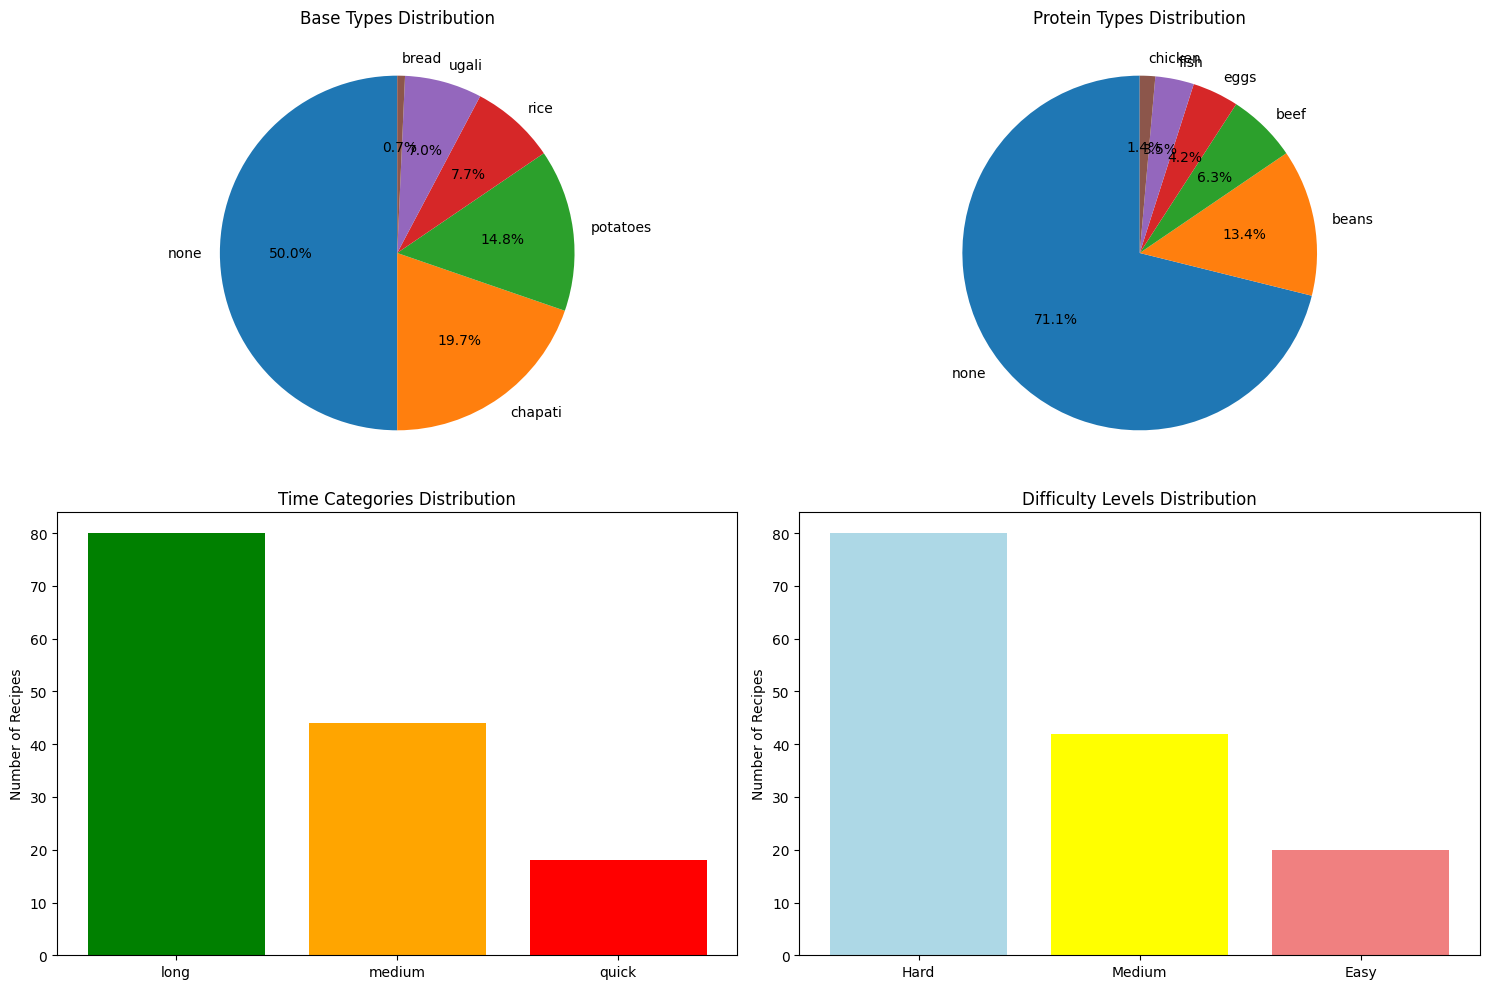


=== MOST COMMON INGREDIENT COMBINATIONS ===
Top Base + Protein combinations:
base_type  protein_type
none       none            49
chapati    none            23
potatoes   none            14
none       beans           11
ugali      none             9
rice       none             6
potatoes   beans            5
none       fish             4
           beef             3
chapati    eggs             3
dtype: int64

=== RECIPE RECOMMENDATIONS BY CATEGORY ===

Quick Recipes (18 total):
  • Kaimati(Fried Dumplings) - 24 min (chapati, none)
  • Oatmeal - 16 min (none, none)
  • Chai ya Maziwa
(Mixed Tea) - 15 min (none, none)
  • Mseto wa Viazi
(Potatoes in rice) - 21 min (rice, none)
  • Kimanga cha 
Viazi Vitamu
 (Mashed Sweet Potatoes and Black Beans) - 20 min (potatoes, beans)

Complete Kenyan Meals (18 total):
  • Enriched Mandazi 
(East African Doughnuts, Enriched) - chapati + eggs (66 min)
  • Meat Samosa
(Sambusa ya Nyama) - chapati + beef (30 min)
  • Pancakes
(Chapati za Maji) - cha

In [43]:
# Create visualizations for the extracted data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Base Types Distribution
base_counts = final_recipe_data['base_type'].value_counts()
axes[0, 0].pie(base_counts.values, labels=base_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Base Types Distribution')

# 2. Protein Types Distribution  
protein_counts = final_recipe_data['protein_type'].value_counts()
axes[0, 1].pie(protein_counts.values, labels=protein_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Protein Types Distribution')

# 3. Time Categories
time_counts = final_recipe_data['time_category'].value_counts()
axes[1, 0].bar(time_counts.index, time_counts.values, color=['green', 'orange', 'red'])
axes[1, 0].set_title('Time Categories Distribution')
axes[1, 0].set_ylabel('Number of Recipes')

# 4. Difficulty Levels
diff_counts = final_recipe_data['difficulty'].value_counts()
axes[1, 1].bar(diff_counts.index, diff_counts.values, color=['lightblue', 'yellow', 'lightcoral'])
axes[1, 1].set_title('Difficulty Levels Distribution')
axes[1, 1].set_ylabel('Number of Recipes')

plt.tight_layout()
plt.show()

# Additional analysis: Most common ingredient combinations
print("\n=== MOST COMMON INGREDIENT COMBINATIONS ===")

# Base + Protein combinations
base_protein_combos = final_recipe_data.groupby(['base_type', 'protein_type']).size().sort_values(ascending=False)
print(f"Top Base + Protein combinations:")
print(base_protein_combos.head(10))

print(f"\n=== RECIPE RECOMMENDATIONS BY CATEGORY ===")

# Quick recipes
quick_recipes = final_recipe_data[final_recipe_data['time_category'] == 'quick']
print(f"\nQuick Recipes ({len(quick_recipes)} total):")
for _, recipe in quick_recipes.head(5).iterrows():
    print(f"  • {recipe['title']} - {recipe['total_time_minutes']} min ({recipe['base_type']}, {recipe['protein_type']})")

# Traditional Kenyan recipes with clear components
kenyan_with_components = final_recipe_data[
    (final_recipe_data['cuisine_type'] == 'Kenyan') & 
    (final_recipe_data['base_type'] != 'none') & 
    (final_recipe_data['protein_type'] != 'none')
]
print(f"\nComplete Kenyan Meals ({len(kenyan_with_components)} total):")
for _, recipe in kenyan_with_components.head(5).iterrows():
    print(f"  • {recipe['title']} - {recipe['base_type']} + {recipe['protein_type']} ({recipe['total_time_minutes']} min)")

print(f"\n🎉 CHAKULA AI DATA EXTRACTION COMPLETE! 🎉")
print(f"Ready to build your meal recommendation system!")